# 1. Crecimiento de la bacteria _V. natriegens_ en medio de cultivo con pH de 7.85

En algún experimento se recopilarón los siguientes datos del crecimiento de la población de bacterias.
Donde "Índice de Tiempo" se refiere a intervalos de 16 minutos.

| Tiempo (minutos) | Índice de Tiempo | Densidad de Población |
|------------------|------------------|-----------------------|
| 0                | 0                | 0.028                 |
| 16               | 1                | 0.047                 |
| 32               | 2                | 0.082                 |
| 48               | 3                | 0.141                 |
| 64               | 4                | 0.240                 |
| 80               | 5                | 0.381                 |

## $\mathrm{i}$) Repitase el análisis de datos visto en clases para esta tabla.

### Notación
Usamos $t$ para denotar el intervalo de tiempo de 16 minutos en que se mide la densidad de población $B_t$; dónde $B_t$ se mide al inicio del intervalo y $t=0$ es el primer intervalo. Así $B_t$ ha sido medido a los $t\times 16$ minutos. Usamos $\Delta$ para asociar el símbolo $\Delta X_y$ con $X_{y+1}-X_y$ por igualdad.

### Gráficas de Datos
Buscamos una relación entre los datos para obtener una ecuación dinámica de la que posiblemente conozcamos una solución y modele el fenomeno con precisión. Encontrar la ecuación de una recta es sencillo, por lo que aplicando transformaciones a los datos esperamos encontrar una relación lineal.

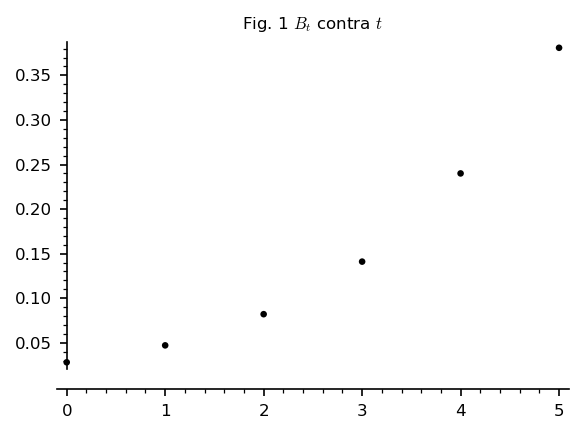

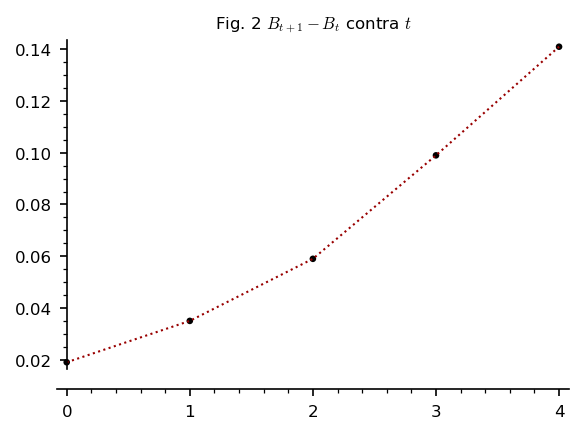

In [1]:
# !! Variables Globales: Tabla1, Tabla2
def MostrarGraficaTabla(tabla, nombre=None, ticks=None, figsize=4, fontsize=8, label=None, dotted=False,
                       pointsize=10):
    G = points(tabla, rgbcolor=(0,0,0), pointsize=pointsize, legend_label=label)
    if dotted:
        G += list_plot(tabla, plotjoined=True, linestyle=":", rgbcolor=(0.6,0,0))
    show(G, title=nombre, ticks=ticks,
                figsize=figsize, fontsize=fontsize, dpi=150)
    
def GraficaTabla(tabla, nombre=None, ticks=None, figsize=4, fontsize=8, label=None, dotted=False,
                pointsize=10):
    G = points(tabla, rgbcolor=(0,0,0), pointsize=pointsize, legend_label=label)
    if dotted:
        G += list_plot(tabla, plotjoined=True, linestyle=":", rgbcolor=(0.6,0,0))
    return plot(G)
    
Tabla1 = list(map(lambda P: (P[0], float(P[1])),
        [(0, 0.028),
        (1, 0.047),
        (2, 0.082),
        (3, 0.141),
        (4, 0.240),
        (5, 0.381)]))


Tabla2 = list()
for t in range(5):
    Tabla2.append( (t, Tabla1[t+1][1]-Tabla1[t][1]) ) # <- aumento B_{t+1}-B_t
    
    
MostrarGraficaTabla(Tabla1, nombre="Fig. 1 $B_t$ contra $t$", ticks = [1,None])
MostrarGraficaTabla(Tabla2, nombre="Fig. 2 $B_{t+1}-B_t$ contra $t$", ticks = [1,None], dotted = True)

Se observa de la figura 1 que cada vez está más separado un valor de otro, con lo que el crecimiento se hace cada vez mayor. Pero de la figura 2 se observa que el crecimiento $B_{t+1}-B_t$ tampoco es lineal sobre el tiempo.  

Como $B_t$ también aumenta con el tiempo, se piensa que podría relacionarse mejor (linealmente) con $B_{t+1}-B_{t}$ que $t$. Dado que ambas son cantidades que aumentan con el tiempo.

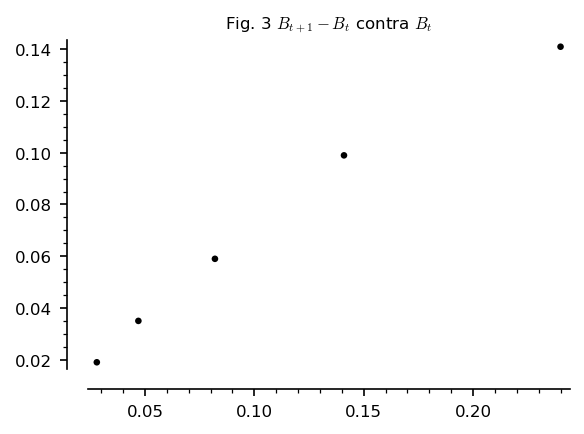

In [2]:
# !! Variable Global: Tabla3 !!
Tabla3 = list()
for t in range(5):
    Tabla3.append( (Tabla1[t][1], Tabla2[t][1]) )
    
MostrarGraficaTabla(Tabla3, nombre="Fig. 3 $B_{t+1}-B_t$ contra $B_t$")

Se puede observar que estos datos muestran una mejor distribución lineal que los de la figura 1 o 2.

### Ecuación Dinámica
Por ahora usaremos $\hat B_t$ para referirnos a la aproximación del valor $B_t$ dado por un modelo lineal. $k$ se refiere a cualquier pendiente de la recta de este modelo (recta que aproxima los datos de la figura 3). De manera que la ecuación de la recta será descrita por una ecuación en terminos de $y = \Delta \hat B_t$ y $x = \hat B_t$, de la forma $y = kx+b$ si $k$ es la pendiente y $b$ es alguna constante real. Es decir

$$\Delta \hat B_t = k \hat B_t +b,$$
o en términos de meramente las densidades
$$\hat B_{t+1} = (1+k)\hat B_t +b.$$

Sea $K = 1+k$, en la ecuación anterior:

$$\hat B_{t+1} = K\hat B_t +b.$$
Luego para $t = n = 1,2,\ldots$
$$
    \hat B_n = K \hat B_{n-1}+b = K \left(K \hat B_{n-2} +b\right)+b = K^2 \hat B_{n-2}+Kb+b = \ldots \\
    = K^n \hat B_0+ b\sum^{n-1}_{j=0}K^j.
$$
Sin embargo para $n=0$ lo anterior nos da la identidad ignorando las igualdades intermedias.
Por lo que también es válido en ese caso usar la última expresión.

Si $K\neq 1$, (que pasa solo cuando $k=0$, y no estamos considerando valores tan bajos)
$$
    \hat B_n = K^n \hat B_0+ b\frac{1-K^n}{1-K}.
$$

Así la solución de la ecuación dinámica de $t$ propuesta al inicio de esta sección es
$$
    \hat B_t = (1+k)^t B_0 +b \frac{(1+k)^t-1}{k} \\
    = (1+k)^t \left(0.028 +\frac{b}{k}\right)-\frac{b}{k}.
$$

Si escogemos $b$ tal que la recta pasa por un punto de los datos $(\hat B_t, \Delta \hat B_t) = (x, y)$ con
$x= B_t, y=\Delta  B_t$; tenemos de la primer ecuación en esta sección que

$$b = y -k x.$$

Por lo que podemos ajustar este modelo solo por el parámetro $k\neq 0$ y escoger algún punto $(x,y)$ (o valor de $b$). Pero como afecta solo como constante y el rango de $b$ es pequeño con los datos considerados se toma como 0.

### Pendiente
Para $t=0,1,2,3$: La pendiente $m_t$ de la recta que conecta
$(B_t,\Delta B_t)$ con $(B_{t+1}, \Delta B_{t+1})$ es 
$$\frac{\Delta B_{t+1} - \Delta B_t}{B_{t+1} - B_t} = \frac{\Delta B_{t+1}-\Delta B_t}{\Delta B_t}.$$
O lo que es lo mismo $$m_t = \frac{\Delta B_{t+1}}{\Delta B_t}-1.$$

**Figura 4.**

| $t$           | $B_t$ | $\Delta B_t$ | $m_t$  |
|-----          |-------|---------------|--------|
| 0             | 0.028 | 0.019         | 0.842  |
| 1             | 0.047 | 0.035         | 0.686  |
| 2             | 0.082 | 0.059         | 0.678  |
| 3             | 0.141 | 0.099         | 0.424  |
| 4             | 0.240 | 0.141         |        |
| 5             | 0.381 |               |        |

Para tomar una buena pendiente $k$ podríamos usar la mediana ya que da la coincidencia que tres puntos son casi colineales en la figura 3. Para ajustar qué tanto se parece la pendiente al promedio o a la mediana tomamos distintos valores de $p$ en la función de promedio ponderado definida en el código. Si $p$ es 0 el promedio ponderado es el normal, si $p$ es grande entonces los valores lejanos de la media tienen más peso.

In [3]:
# !! Variable Global: lista_m !!
lista_m = list()
for t in range(len(Tabla3)-1):
        lista_m.append(Tabla3[t+1][1]/Tabla3[t][1]-1)

#promedio ponderado por inverso de distancia promedio (elevado a potencia p)
#cuando mayor sea p, mayor la influencia de la distancia
#cuando p = 0, es simplemente el promedio de pesos iguales
#https://en.wikipedia.org/wiki/Inverse_distance_weighting

# Cuando se usa se imprime una tabla con los pesos que se le pone a cada valor por default
# Los digitos son solo para los datos que se imprimen, no el valor regresado por la función
def promedio_ponderado(conjunto, p, verbose=False, digitos=3, nombre=None):
    promedio = mean(conjunto)
    if verbose:
        print(nombre)
        print("Valor\tPeso")

    n = len(conjunto)
    suma_pesos = 0
    suma_valor_peso = 0

    for valor in conjunto:
        if abs(valor - promedio) == 0: return valor 
        suma_pesos += 1/abs(valor - promedio)**p
        suma_valor_peso += valor/abs(valor - promedio)**p
        if verbose:
            print(round(valor, digitos), "\t\t", round(1/abs(valor - promedio)**p, digitos))
    
    return suma_valor_peso/suma_pesos

Como ejemplo, el promedio con pesos iguales para cada pendiente es el siguiente.

In [4]:
promedio_ponderado(lista_m, p=0)

0.65750701870238

### Graficas de Soluciones

Tomamos un promedio ponderado de las pendientes y ajustamos a ojo por una mejor solución.

In [5]:
# !! Var. Global SolucionDensidad, B_0, digitos_entrada, formato !!
import pandas as pd
pd.set_option('display.precision', 3r)

B_0 = Tabla1[0][1]

digitos_entrada = 4
digitos_salida = 3

def TablaRecta(k, b=0):
    y = "$\\Delta \\hat B_t = "+str(round(k,digitos_entrada))+"\\hat B_t"
    if b!=0:
        y+="+("+str(round(b,5))+")"
    y+= "$"
    df = pd.DataFrame(map(lambda t,P: (t, P[0], k*P[0]+b, P[1]), range(len(Tabla3)), Tabla3),
              columns=["$t$", "$\\hat B_t$", y, "$\\Delta B_t$"])
    return df.style.hide_index()

SolucionDensidad = lambda k,b=0: (1+k)^t *(B_0 +b/k)-b/k
    
def TablaDensidad(k, b=0):
    y = "$\\hat B_t = ("
    y += str(round(1+k,digitos_entrada))+")^t"
    y += "\\cdot"+str(round(B_0+b/k, digitos_entrada))
    if b!=0:
        y+= "-("+str(round(b,5))+")"
    y += "$"
    df = pd.DataFrame(map(lambda P: (P[0], float(SolucionDensidad(k,b)(t=P[0])), P[1]), Tabla1),
              columns=["$t$", y, "$B_t$"])
    return df.style.hide_index()

def mostrarGraficaRecta(k, titulo, b=0):
    var('t')
    legend="$\\Delta \\hat B_t = "+str(round(k, digitos_entrada))+"\\hat B_t"
    if b!=0: legend+="+("+str(round(b,5))+")"
    legend+="$"
    GraficaCambio = plot(k*t+b, # <- EC RECTA
                          # t de 0 a max{x: (x,y) en Tabla3}*1.1
                         (t,0,max(map(lambda P: P[0], Tabla3))*1.1),
                         legend_label=legend)
    GraficaCambio.set_legend_options(font_size=8)
    
    show(GraficaCambio+GraficaTabla(tabla=Tabla3, label="$\\Delta B_t$", pointsize=5),
         title=titulo,
         figsize=4, fontsize=8, ticks=[0.05,None], axes_labels=['$B_t$',None], dpi=150)
    return TablaRecta(k, b)

def mostrarGraficaDensidad(k, titulo, b=0):
    var('t')
    legend = "$\\hat B_t ="+str(round(1+k, digitos_entrada))+"^t\\cdot("+str(round(B_0+b/k, 5))+")"
    if b!= 0: legend += "-("+str(round(b/k,5))+")"
    legend += "$"
    GraficaDensidad = plot(SolucionDensidad(k, b=0), # <- MODELO
                           (t, 0, max(map(lambda P: P[0], Tabla1))*1.1),
                           legend_label=legend)
    GraficaDensidad.set_legend_options(font_size=8)
    
    show(GraficaDensidad+GraficaTabla(Tabla1, label="$B_t$", pointsize=10),
         title=titulo,
         figsize=4, fontsize=8, axes_labels=['$t$',None], dpi=150)
    return TablaDensidad(k, b)

In [6]:
b = lambda P,k: float(P[1] - k*P[0]) # y -kx

def Graficas(k, n_fig, P=[0r,0r], ajuste_b=0):
    b_redondeado = round(b(P,k)*ajuste_b,5)
    nombre = "Figura "+str(n_fig)+".1  Tasa de Crecimiento Relativo $k="+str(round(k, digitos_entrada))
    if ajuste_b != 0:
        nombre+=",b="+str(b_redondeado*ajuste_b)
    nombre+= "$"
    Tabla1 = mostrarGraficaRecta(k, nombre, b(P,k)*ajuste_b)
    
    nombre = "Figura "+str(n_fig)+".2  Solución del Sistema Dinámico $k="+str(round(k, digitos_entrada))
    if ajuste_b !=0:
        nombre += ",b="+str(round(b(P,k)*ajuste_b,5))
    nombre+= "$"
    Tabla2 = mostrarGraficaDensidad(k, nombre, b(P, k)*ajuste_b)
    return Tabla1,Tabla2

Damos dos ajustes para el modelo. El primero dado por la figura 5 se ajusta para acercarse más a solo los puntos que parecen colineales. El de la figura 6 intenta minimizar la distancia de la recta a todos los puntos.

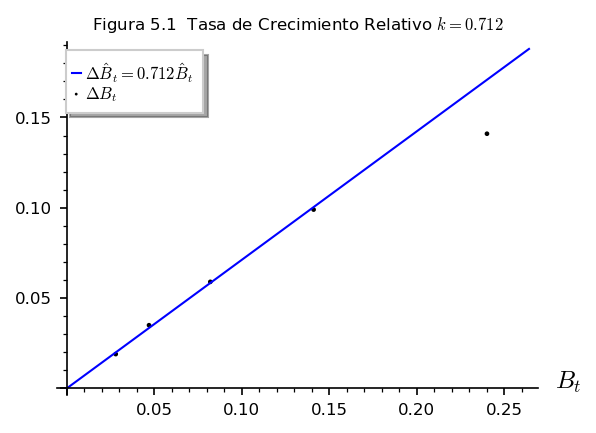

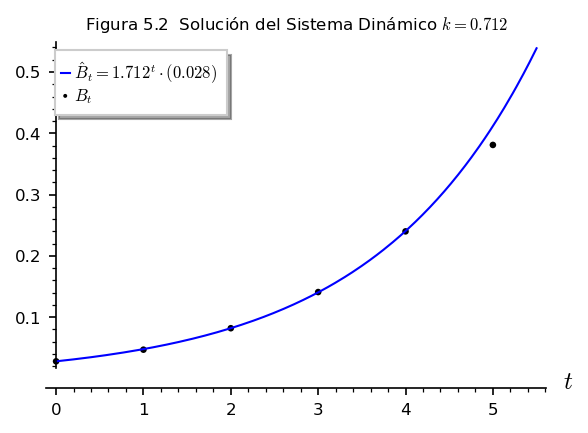

$t$,$\hat B_t$,$\Delta \hat B_t = 0.712\hat B_t$,$\Delta B_t$
0,0.028,0.020,0.019
1,0.047,0.033,0.035
2,0.082,0.058,0.059
3,0.141,0.100,0.099
4,0.240,0.171,0.141


$t$,$\hat B_t = (1.712)^t\cdot0.028$,$B_t$
0,0.028,0.028
1,0.048,0.047
2,0.082,0.082
3,0.140,0.141
4,0.241,0.240
5,0.412,0.381


In [7]:
k1 = float(promedio_ponderado(lista_m[:-1], p=(1.11+80E-4)))
counter = 3

for tabla in Graficas(k1, 5):
    nombre = "Figura 5."+str(counter)
    display(tabla.set_caption(nombre))
    counter += 1

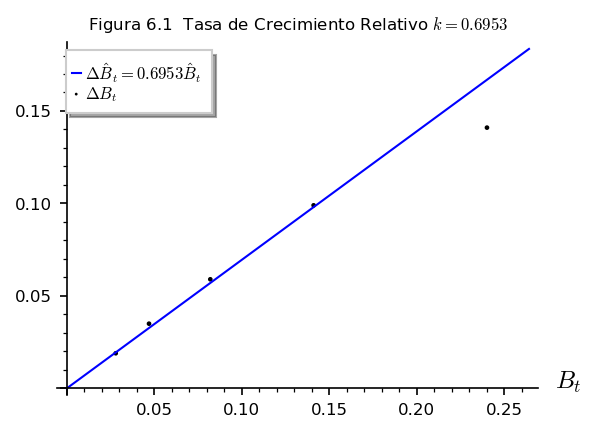

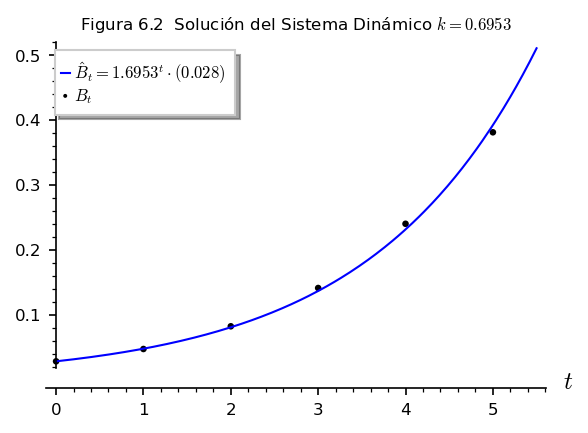

$t$,$\hat B_t$,$\Delta \hat B_t = 0.6953\hat B_t$,$\Delta B_t$
0,0.028,0.019,0.019
1,0.047,0.033,0.035
2,0.082,0.057,0.059
3,0.141,0.098,0.099
4,0.240,0.167,0.141


$t$,$\hat B_t = (1.6953)^t\cdot0.028$,$B_t$
0,0.028,0.028
1,0.047,0.047
2,0.080,0.082
3,0.136,0.141
4,0.231,0.240
5,0.392,0.381


In [8]:
k2 = promedio_ponderado(lista_m[:], p=8)+promedio_ponderado(lista_m[:-1], p=1.11)
k2 = float(k2/2)

counter = 3
for tabla in Graficas(k2, 6):
    nombre = "Figura 6."+str(counter)
    display(tabla.set_caption(nombre))
    counter += 1

El modelo preferido depende del conocimiento del experto en el área del experimento. Si el experto sabe que los datos de la tasa de crecimiento relativo se deben ajustar a una recta con un varianza bastante pequeña, se prefiere el modelo de la figura 5 y se ignora el último punto como error de medición. Pues tenemos en densidad, una diferencia con los datos de a lo mucho el último digito.

El segundo modelo dado por la figura 6 se prefiere, si es el conocimiento del experto es que la varianza del experimento sí debería ser alta en algunos intervalos de tiempo. De manera que los datos anormales pueden ser bien medidos, y reducir la distancia a todos los puntos nos acercaría al valor esperado de un experimento en estas condiciones.

## ii) Comparación de Tasa de Crecimiento Relativo de V. natriegens a pH 7.85  con Tasa de Crecimiento Relativo 2/3 a pH 6.25
Comparamos los resultados anteriores con el modelo cuando $k=2/3$.

In [9]:
if False:
    for k in (2/3, k1, k2):
        display(TablaRecta(float(k)).set_table_attributes("style='display:inline'").set_caption(str("$k="+str(k))+"$"))
    
def TablaComparacion(k_tuple, Datos):
    columnas = ["$t$", "$\\hat B_t$"]
    # Convertir a string redondeado si float
    def k_display(k):
        if type(k) == type(2/3):
            return str(k)
        else:
            return str(round(k, 3))
    columnas.extend(list(
        map(lambda k: str("$\\Delta \\hat B_t = "+k_display(k)+"\\hat B_t$"), k_tuple) ))
    columnas.append("$\\Delta B_t$")
    
    df = list(map(lambda t,P: [t, P[0], P[1]], range(len(Datos)), Datos))
    for k in k_tuple:
        for fila in df:
            fila.insert(-1, float(k*fila[1]))
    df = pd.DataFrame(df, columns=columnas)
    return df.style.hide_index()

display(TablaComparacion((2/3, k1, k2), Tabla3).set_caption("Comparación de Tasas de Crecimiento Relativo"))

$t$,$\hat B_t$,$\Delta \hat B_t = 2/3\hat B_t$,$\Delta \hat B_t = 0.712\hat B_t$,$\Delta \hat B_t = 0.695\hat B_t$,$\Delta B_t$
0,0.028,0.019,0.020,0.019,0.019
1,0.047,0.031,0.033,0.033,0.035
2,0.082,0.055,0.058,0.057,0.059
3,0.141,0.094,0.100,0.098,0.099
4,0.240,0.160,0.171,0.167,0.141


En la tabla anterior $B_t$ es para los datos de pH 7.85. Podemos observar que para una misma densidad de población $B_t$, la tasa de crecimiento es siempre inferior para el pH 6.25. 

Sin embargo cuando $t=4$ el modelo con tasa relativa de crecimiento $k=2/3$ se asemeja más al dato medido para el pH de 7.85. De hecho la media normal para las posibles constantes $k$ para el pH de 7.85 es $0.657$ que es menor a $2/3$. 

Por lo que bien podría ser que $k=2/3$ sea una solución para el crecimiento de la bacteria a pH 7.85. Pero esto no significa que vayan a ser las mismas, pues $k=2/3$ se ajusta a los datos de su experimento de pH 6.25 de manera similar que $k=0.712$ se ajusta a los datos del experimento a pH 7.85.

**Modelo con $k=2/3$ comparado con los datos del experimento con pH 6.25**

| $t$ | $\hat B_t$    | $B_t$    |
|---|-------|-------|
| 0 | 0.022 | 0.022 |
| 1 | 0.037 | 0.036 |
| 2 | 0.061 | 0.06  |
| 3 | 0.102 | 0.101 |
| 4 | 0.17  | 0.169 |
| 5 | 0.238 | 0.266 |

La diferencia es a lo más un último digito hasta el último dato que se ajusta peor. De manera que la diferencia entre las tasas de crecimientos está justificada bajo los mismos supuestos. Es decir, supuestos como que se debe ajustar mejor el modelo a los primeros puntos.

# 2. $B_t − B_{t−1} = r B_{t−1}$ , tiene la misma información que $B_{t+1} − B_t = r B_t$
## a) Dado $r$ y $B_0$ encontrar $B_4$ a partir de las ecuaciones $B_t − B_{t−1} = r B_{t−1}$ con $t=1,2,3,4$.

Dadas las siguientes ecuaciones

$$B_1-B_{0}= r B_{0},$$
$$B_2-B_{1}= r B_{1},$$
$$B_3-B_{2}= r B_{2},$$
$$B_4-B_{3}= r B_{3}.$$

Se tiene por sumar respectivamente y agrupar $B_t,t=0,1,2,3$ que
$$B_1= (1+r) B_{0},$$
$$B_2= (1+r) B_{1},$$
$$B_3= (1+r) B_{2},$$
$$B_4= (1+r) B_{3}.$$

De aquí meramente se sustituye en la derecha de $B_4$ con las igualdades.
$$B_4= (1+r) (1+r) B_{2},$$
$$B_4= (1+r) (1+r) (1+r) B_{1} ,$$
$$B_4= (1+r) (1+r) (1+r) (1+r) B_{0} ,$$
$$B_4= (1+r)^4 B_0.$$

### Prueba por Inducción
En general si una secuencia de reales $\{B_t\}_{t\in\mathbb N}$ cumple que para un $r$ fijo, 
$$B_t-B_{t-1}= r B_{t-1}, t\in\mathbb N$$

Entonces también cumple que
$$B_{t+1} -B_t= rB_t, t\in\mathbb Z^+.$$

Si además $r\neq 0$. Para $t=0$ es cierto que
$$B_t = (1+r)^t B_0.$$
Si se cumple lo anterior para $t$ no necesariamente $0$, tenemos
$$B_{t+1} -B_t= r B_t,$$
$$B_{t+1} = (1+r)B_t.$$
Y como para $t$ hemos supuesto que $B_t = (1+r)^t B_0,$
$$B_{t+1} = (1+r)\left[(1+r)^t B_0\right],$$
$$B_{t+1} = (1+r)^{t+1} B_0.$$
Por lo que también se cumple $B_n = (1+r)^n B_0$ para $n=t+1$ dado que se cumple para $n=t$.
Como es cierto para $t=0$, por inducción es cierto para $t\in\mathbb Z^+$, con el supuesto que
$$B_t-B_{t-1}= r B_{t-1}, t\in\mathbb N.$$

## b) Escribir ecuaciones para $B_{40}$ en los siguientes casos.
### 1) $B_0=50$ dado que $B_t-B_{t-1}= 0.2 B_{t-1}.$
Por lo que acabamos de probar, tomando $r = 0.2$ tenemos que
$$B_{40} = (1.2)^{40} \times 50.$$

### 2) $B_0 = 50$ dado que $B_t-B_{t-1} = -0.1 B_{t-1}$.
En lo que probamos anteriormente tomamos $r= -0.1$:
$$B_{40} = (0.9)^{40} \times 50.$$

# 3. Reacción en Cadena de la Polimerasa para Copiar Segmentos de ADN

## Descripción y Notación
Llamamos a un ciclo a la duplicación de una cantidad de ADN inicial.
En notación matemática esto es que al terminar el ciclo $n=0,1,\ldots$ hay una cantidad $B_{n+1}=2B_n$ de ADN, dado que el ciclo inició con la cantidad $B_n$ de ADN.

Con estos dos datos podemos deducir que habiendo pasado $n\geq 0$ ciclos el proceso obedece que
$$B_n = 2 B_{n-1} = 2^2 B_{n-2} =\ldots = 2^n B_0.$$

(Ignorando las igualdades intermedias si $B_{n-1}$ o $B_{n-2}$ no está definido.)

Con una cantidad inicial $B_0 = 10^{-12}\text{g}$ de ADN en el inicio del ciclo 0, tras 30 ciclos tenemos $B_{30} = 2^{30}\times 10^{-12}\text{g}$ de ADN (al inicio del ciclo 30).

In [14]:
round(2**30*10**(-12),12)

0.001073741824

Esto es $0.001073741824$ gramos.

# 4. Crecimiento Exponencial de la Población Humana

## Descripción y Notación
$t$ es el número de décadas después de 1940. $P_t$ es la población en millones en el año $1940+10t$.
Sea $\Delta P_t = P_{t+1}-P_t$.

In [99]:
from numpy import array
#Tabla41 = pd.read_clipboard()
Tabla41.to_dict()
data = {'$t$': {1940: 0, 1950: 1, 1960: 2, 1970: 3, 1980: 4, 1990: 5, 2000: 6, 2010: 7},
 'Poblacion $10^6$': {1940: 2.3r,
  1950: 2.52r,
  1960: 3.02r,
  1970: 3.7r,
  1980: 4.45r,
  1990: 5.3r,
  2000: 6.06r,
  2010: 6.8r}}
Tabla41 = pd.DataFrame(data)
display(Tabla41.style.set_caption("Figura 1."))

,$t$,Poblacion $10^6$
1940,0,2.300
1950,1,2.520
1960,2,3.020
1970,3,3.700
1980,4,4.450
1990,5,5.300
2000,6,6.060
2010,7,6.800


## a) Probar la ecuación contra los datos

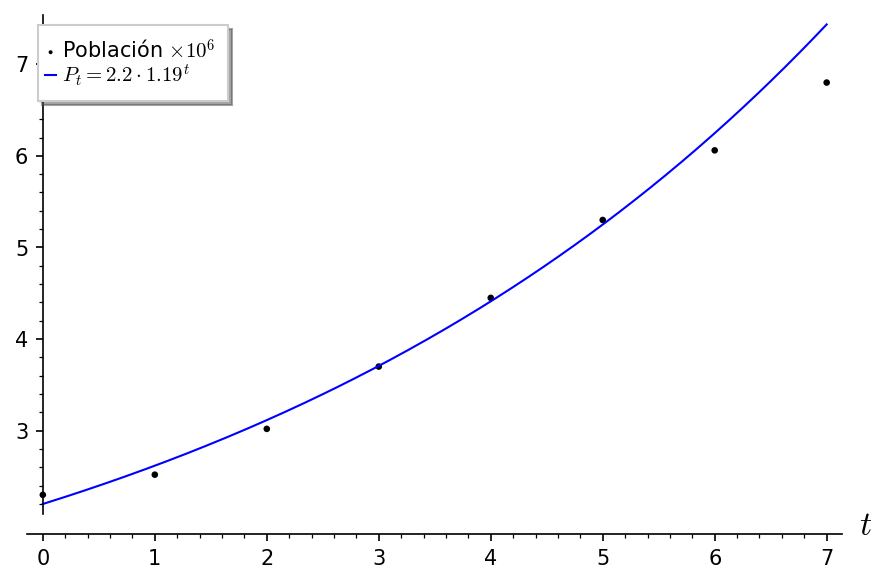

In [148]:
var('t')
show(points(Tabla41.to_numpy(), rgbcolor=(0,0,0), legend_label="Población $\\times 10^6$")
     +plot(2.2*1.19**t, (x,0,7), legend_label="$P_t = 2.2\\cdot 1.19^t$"),
     dpi=150, axes_labels=["$t$",None])

In [154]:
Comparacion = list(map(lambda P: (P[0], P[1], float(2.2*1.19**P[0])), Tabla41.to_numpy()))
Comparacion = pd.DataFrame(Comparacion,
                           columns = ["t","Poblacion $\\times 10^6$", "$2.2\\cdot 1.19^t$"],
                          index=[1940+j*10 for j in range(len(Comparacion))])
display(Comparacion)

,t,Poblacion $\times 10^6$,$2.2\cdot 1.19^t$
1940,0,2.30,2.200
1950,1,2.52,2.618
1960,2,3.02,3.115
1970,3,3.70,3.707
1980,4,4.45,4.412
1990,5,5.30,5.250
2000,6,6.06,6.247
2010,7,6.80,7.434


Se puede observar que los datos están cerca de lo que predice la ecuación en un margen de $10^5$ sin sobrestimar o subestimar todos los puntos. Es decir la distancia a los datos es relativamente buena, también tomando en cuenta la complejidad de lo que se intenta modelar.

## b) ¿Qué porcentaje de aumento en la población en cada década supone el modelo para esta ecuación?
Como el modelo es $P_t = 2.2\cdot 1.19^t$, $1.19= 1+r$ donde $r=0.19$ es la tasa de crecimiento relativo a la población; es decir viene de la ecuación $\Delta P_t = r P_t$; entonces $19\%$ es el porcentaje de aumento de la población porque $t$ está dado por decadas.

## c) ¿Qué población predice la ecuación para el año 2050?
El año 2050 está dado por $1940+10t$, entonces $t= (2050-1940)/10 = 11$ es la decada correspondiente a 2050.
Así la población predecida para el año 2050 es $P_{11} = 2.2 \cdot 1.19^{11}= 14.908682$ millones.

In [159]:
print((2050-1940)/10)
round(2.2*1.19**11,6)

11


14.908682